In [676]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

#https://www.qdusa.com/sitedocs/UnitsChart.pdf

p = 6050 #density
M = 1.05319  #molar mass  material 
m = 19.71*10**(-6) #mass of sample
S = 3.0/2.0 #spin
T = 1.79 #temperature

#SI units throughout
mu_0 = 4*np.pi*10**(-7)
k_B = 1.38064852*10**(-23)
mu_B = 9.274009994*10**(-24)
n = 3.0/(289.28*10**(-30))
r = 4.18*10**(-10) #Nd-Nd distance
g = 0.727 #why this g-factor?????
N_A = 6.02214085*10**(23)
susc = (p/M)*(1.19029337821*10**(-5)) #volume susceptibility calculated at T=1.8106K

M0 = 1./(3.*N_A*(m/M)) #bohr magneton per Nd
#M0 = 1.0/m #emu/g units
#M0 = 4*np.pi*10**(-6)*1.0/(m/p) #SI units?

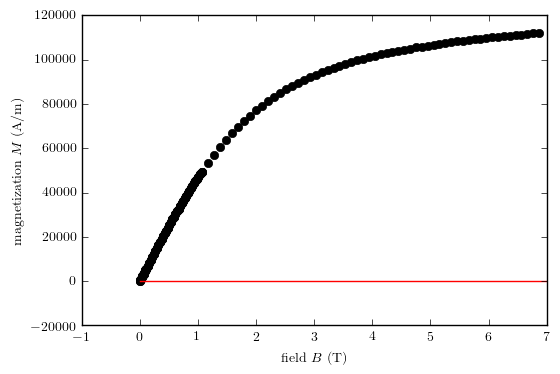

0.999995108197
[  0.06909959 -29.45151703]
[  2.88822998e-05   1.29677056e+00]
0.0690995896897


In [677]:
magTi = np.genfromtxt('Nd3Ga5TiO14-powder-MvsH.rso.dat',delimiter=',',skip_header=32)

field = magTi[:,2]
mag = M0*magTi[:,4]
error = M0*magTi[:,5]
#H = field/10000

#ALL IN SI UNITS HERE!
emm = p*magTi[:,4]/(1000*m)
haitch = field*1000/(4.*np.pi)
bee = (haitch+emm)*mu_0

x = np.linspace(0, 7, 400)
#plt.plot(field[:200]/10000, mag[:200]/(1000*mu_B), 'o', color='purple', label="Nd-Ti")
plt.plot(bee[:200], emm[:200], 'o', color='black', label="Nd-Ti")
plt.plot(x, linear(x,a,b), color='red', label="Nd-Ti")
plt.xlabel("field $B$ (T)")
plt.ylabel("magnetization $M$ (A/m)")
plt.savefig('powder.png')
plt.rcParams["figure.figsize"] = [6,4]
plt.show()
plt.close()

#fitting to check susceptibility dM/dH
def linear(x,a,b):
    return a*x+b
p0 = [1.0,1.0]
popt, pcov = curve_fit(linear, haitch[:30], emm[:30], p0)
perr = np.sqrt(np.diag(pcov))
residuals = emm[:30] - linear(haitch[:30], *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((emm[:30]-np.mean(emm[:30]))**2)
r_squared = 1 - (ss_res / ss_tot)
#parameters of fit
print(r_squared)
print(popt)
print(perr)
print(a)

In [678]:
#fitting
j=9/2
def fit(x,A):
    return A*g*n*mu_B*j*((2.*j+1.)/(2*j*np.tanh((2.*j+1.)*g*mu_B*j*x/(k_B*(T)*2*j)))-1.0/(2.*j*np.tanh(g*mu_B*j*x/(k_B*(T)*2*j))))
#best guess
p0 = [0.5]
#curve fitting
popt, pcov = curve_fit(fit, field[2:200]/10000, emm[2:200], p0)
perr = np.sqrt(np.diag(pcov))
residuals = emm[2:200] - fit(field[2:200]/10000, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((emm[2:200]-np.mean(emm[2:200]))**2)
r_squared = 1 - (ss_res / ss_tot)
#parameters of fit
print(r_squared)
print(popt)
print(perr)
A=popt


0.998865610108
[ 0.36288533]
[ 0.00055595]


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract


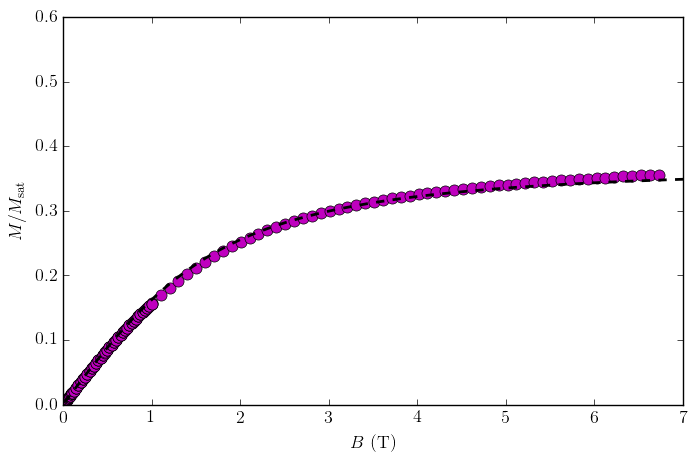

In [679]:
plt.rcParams.update({'font.size': 13})
x = np.linspace(0, 8, 400)
plt.rcParams["figure.figsize"] = [8,5]
#plt.plot(bee[:200], mag[:200]/(1000*mu_B), 'mo', label="Nd-Ti",markersize=6) #moment per mol
#plt.plot(x, fit(x,A,j)*N_A/(3*n), color='black',label="Nd-Ti",linewidth=2) #saturation magnetization
plt.plot(field[:200]/10000, emm[:200]/(g*n*mu_B*j), 'mo', label="Nd-Ti",markersize=8) #saturation magnetization
plt.plot(x, fit(x,A)/(g*n*mu_B*j), color='black',label="Nd-Ti",linewidth=2, linestyle='dashed') #saturation magnetization
#plt.plot(x, fit(x,A,j)/A, color='red',label="Nd-Ti",linewidth=2)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel("$B$ (T)")
plt.ylabel("$M/M_\mathrm{sat}$")
#plt.savefig('NTGO_mag_powder.eps')
#plt.rcParams["figure.figsize"] = [6,4]
plt.xlim([0,7])
plt.ylim([0,0.6001])
plt.show()
plt.close()


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in true_divide
/usr/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in subtract


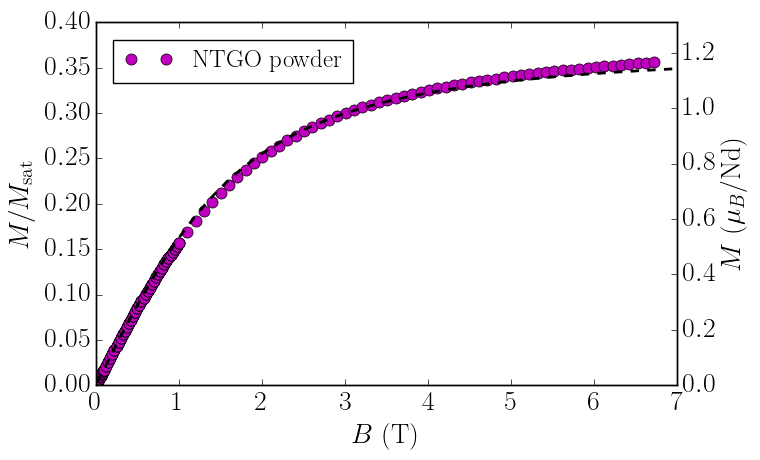

In [694]:
plt.rcParams.update({'font.size': 20})
fig, ax1 = plt.subplots()
ax1.set_xlabel('$B$ (T)')
ax1.plot(field[:200]/10000, emm[:200]/(g*n*mu_B*j), 'mo',markersize=8, label="NTGO powder") #saturation magnetization
ax1.plot(x, fit(x,A)/(g*n*mu_B*j), color='black',linewidth=2, linestyle='dashed') #saturation magnetization
ax1.legend(bbox_to_anchor=(0.03, 0.95), fontsize=18, loc=2, borderaxespad=0.)
ax1.set_ylabel('$M/M_\mathrm{sat}$')
ax1.tick_params(axis='y')
ax1.set_xlim([0,7])
ax1.set_ylim([0,0.4001])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_xlim([0,7])
ax2.set_ylim([0,1.31])
ax2.set_ylabel('$M$ ($\\mu_B$/Nd)')  # we already handled the x-label with ax1
#ax2.plot(field[:200]/10000, mag[:200]/(1000*mu_B),'or')
ax2.tick_params(axis='y')
plt.rcParams["figure.figsize"] = [8,5]
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('NTGO_mag_powder.eps')
plt.show()